In [70]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic

In [193]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
DPI = 300
#TODO: 添加标题、图例等细节
#TODO: 字体、颜色美化

In [204]:
df = pd.read_excel('UPs.xlsx',index_col=2)
df.columns = ['no','name','time','special','face','fans','total','view','likes','type','field','first','newest','update','watch']
df.head()

,no,name,time,special,face,fans,total,view,likes,type,field,first,newest,update,watch
UID,,,,,,,,,,,,,,,
41759,0,-小拉-,2022-12-08,否,https://i2.hdslb.com/bfs/face/ce83957d60ce9800...,286680,30,12865058,723059,"综合,科技",生活,2022-06-21,2022-12-04,仍在更新,经常
399763875,1,Biloneness,2022-12-07,否,http://i0.hdslb.com/bfs/face/70e5621d3ca80fe1e...,12,2,10,10,同学,生活,2022-06-07,2022-06-07,停更风险,很少
102541434,2,无极恋画,2022-12-06,否,https://i0.hdslb.com/bfs/face/8297704cd928e35a...,86914,94,2470178,137713,"知识,影视",知识,2018-02-27,2022-12-09,仍在更新,经常
381801980,3,修理铺韩师傅,2022-12-06,否,https://i2.hdslb.com/bfs/face/6dcffadade0fd367...,13897,4,724358,35531,"手工,生活",生活,2022-10-23,2022-12-04,仍在更新,有时
3493075427002798,4,VitoShen涤非,2022-12-06,是,https://i1.hdslb.com/bfs/face/e8c393b710c5bd1c...,639,14,16251,746,"知识,影视",科技,2022-11-29,2022-12-13,仍在更新,有时


## 分区分析

### UP主分区

### 哪些UP主不只专注于一个分区？

In [147]:
two_fields=[]
for index,item in df['field'].iteritems():
    if ',' in item:
        two_fields.append(index)
two_fields = df.loc[two_fields,:]
num_two = len(two_fields)
num_one = len(df) - num_two
ic(num_one,num_two);

ic| num_one: 769, num_two: 61


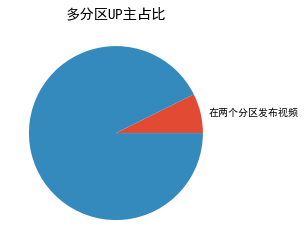

In [194]:
plt.figure()
plt.title('多分区UP主占比')
plt.pie([num_two,num_one],labels=['在两个分区发布视频','']);

In [165]:
fans_levels = [
    '0-100',
    '100-1000',
    '1000-1万',
    '1万-10万',
    '10万-100万',
    '>100万'
]
def get_fans_level(number:int)->str:
    if number > 1000000:
        return fans_levels[5]
    elif number > 100000:
        return fans_levels[4]
    elif number > 10000:
        return fans_levels[3]
    elif number > 1000:
        return fans_levels[2]
    elif number > 100:
        return fans_levels[1]
    else:
        return fans_levels[0]

In [166]:
two_fields['fans_level'] = two_fields['fans'].apply(get_fans_level)

In [160]:
two_fields.groupby('fans_level')['fans'].count()

fans_level
0-100        3
100-1000     3
1000-1万      7
10万-100万    19
1万-10万      11
>100万       18
Name: fans, dtype: int64

In [175]:
level_count = two_fields['fans_level'].value_counts()[fans_levels]
level_count

0-100        3
100-1000     3
1000-1万      7
1万-10万      11
10万-100万    19
>100万       18
Name: fans_level, dtype: int64

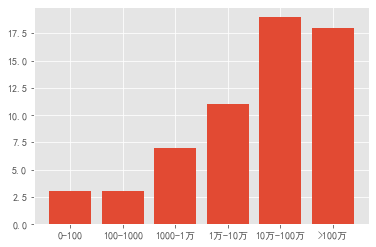

In [195]:
plt.figure()
plt.bar(fans_levels,level_count);

In [202]:
two_fields.query('fans > 100000')['field']

UID
5294454       生活,动画
38899675      知识,动画
623512391     生活,科技
1950658       动画,音乐
23079060      知识,科技
476046509     生活,知识
693447092     知识,科技
365355167     科技,知识
2200736       生活,科技
397211154     知识,音乐
254463269     知识,生活
2026561407    生活,资讯
5970160       游戏,生活
250111460     生活,知识
1526101       舞蹈,生活
491979247     知识,动画
493656793     舞蹈,生活
476819048     生活,知识
37781521      影视,知识
481434238     知识,科技
64840236      生活,音乐
550601912     生活,知识
54992199      知识,资讯
503481919     知识,生活
20259914      知识,科技
348640514     生活,科技
26366366      动画,生活
489412051     音乐,娱乐
33683045      知识,资讯
5581898       知识,生活
390371228     生活,知识
7487399       动画,影视
97469480      生活,知识
1768861       游戏,生活
185546        音乐,鬼畜
64169458      知识,科技
10783631      知识,游戏
Name: field, dtype: object

ic| len(fields): 830


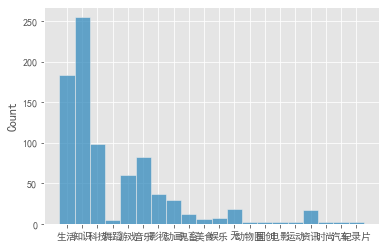

In [198]:
fields = []
for index,item in df['field'].iteritems():
    fields.append(item.split(',')[0])
ic(len(fields))
sns.histplot(fields);

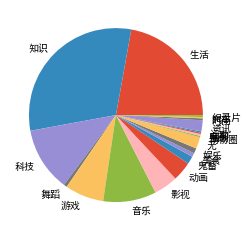

In [199]:

from collections import Counter
x = [i for i in Counter(fields).values()]
labels = [i for i in Counter(fields).keys()]
#plt.figure(figsize=(1000/300,1000/300),dpi=300)
plt.pie(x,labels=labels);